<a href="https://colab.research.google.com/github/goglom/Digital-data-processing-and-discrete-analysis-methods/blob/main/problem_1/FourierSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# Класс реализующий разложение в ряд Фурье

In [ ]:
def numpy_wrapper(func):
    return lambda arr: np.array([func(x) for x in arr])

class FourierSeries:
    def a_factor(self, n):
        func = lambda t: 2 / self.T * self.f(t) * np.cos(self._arg(n, t))
        return quad(func, self.a, self.b )[0]

    def b_factor(self, n):
        func = lambda t: 2 / self.T * self.f(t) * np.sin(self._arg(n, t))
        return quad(func, self.a, self.b)[0]

    def __init__(self, func, count: int, a: float=-np.pi, b: float=np.pi):
        self.f = func
        self.N = count
        self.a = a
        self.b = b
        self.T = b - a
        self.a_factors = np.array([self.a_factor(i) for i in range(self.N + 1)])
        self.b_factors = np.array([self.b_factor(i) for i in range(1, self.N + 1)])
        self.cosines = np.array([])
        self.sines = np.array([])

    def _arg(self, n, t):
        return n * 2 * np.pi * t / self.T

    def _calc(self, t):
        self.cosines = np.cos(self._arg(np.arange(0, N + 1), t))
        self.cosines[0] /= 2
        self.sines = np.sin(self._arg(np.arange(1, N + 1), t))

    def __call__(self, _x: float) -> np.array:
        self._calc(_x)
        result = np.dot(self.cosines, self.a_factors)
        result += np.dot(self.sines, self.b_factors)
        return result
    
    def get_func(self):
        return numpy_wrapper(self.__call__)

In [ ]:
def paint_func(orig_f, custom_f, orig_range, custom_range, N=10, num=1000):
    series = FourierSeries(custom_f, N, *custom_range)
    fs = series.get_func()
    x = np.linspace(*orig_range, num=num)
    y = orig_f(x)
    ys = fs(x)

    plt.figure(1)
    plt.title("Вид функций")
    plt.plot(x, y, "r--", label="ориг.")
    plt.plot(x, ys, label="ряд")
    plt.legend()

    plt.figure(2)
    plt.title("a_n")
    plt.bar(range(N + 1), series.a_factors)

    plt.figure(3)
    plt.title("b_n")
    plt.bar(range(1, N + 1), series.b_factors)

# Разложения в ряд
Рассмотрим разложение в ряд Фурье для различных способов доопределения функции $f(x) = x^3, x\in[0, 1]$ до периодичной 

1) Продлим нашу функцию $f$ на интервал $[-1, 1]$ нечётным образом

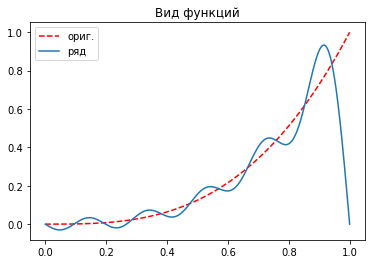

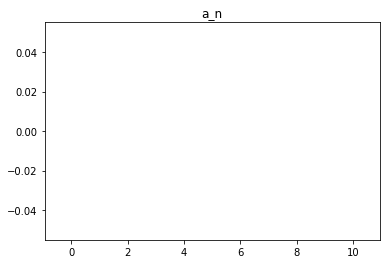

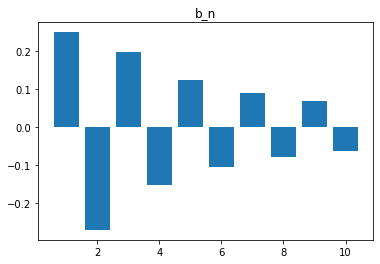

In [ ]:
# Диапазон разложения
orig_range = (0, 1)
custom_range = (-1, 1)
# Число элементов разложения
N = 10

f_1 = lambda x: x**3;

paint_func(f_1, f_1, orig_range, custom_range)

2) Разложим в ряд Фурье продлённую чётным образом функцию $f(x)$

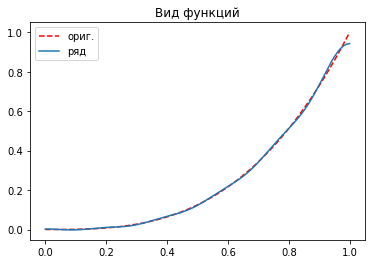

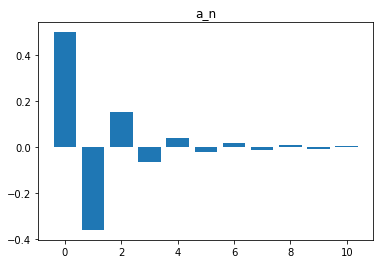

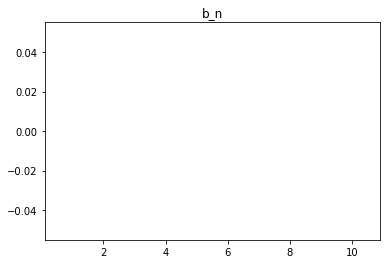

In [ ]:
f_2 = lambda x: np.abs(f_1(x))
paint_func(f_1, f_2, orig_range, custom_range)

3) Отнимим от функции $f(x)$ линейную функцию, так чтобы на концах отрезка $[-1, 1]$ она занулялась: $f_{corrected}(x) = x^3 - x$. И разложим новую функцию в ряд Фурье

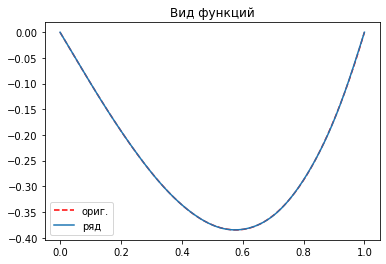

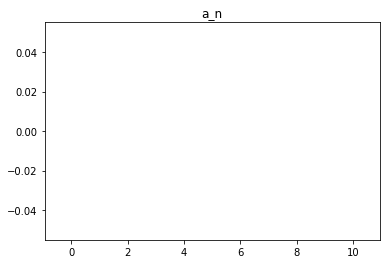

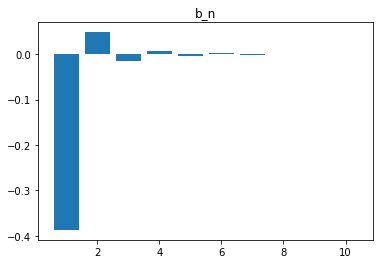

In [ ]:
f_3 = lambda x: f_1(x) - x
paint_func(f_3, f_3, orig_range, custom_range)